# Exploratory Analysis of ML models

In [1]:
# import libraries
import os
import pandas as pd
import numpy as np

import seaborn as sns # install seaborn with either pip or conda, used for heat maps
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import xgboost as xgb

# import DataSet
from util.data_util import DataSet

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, confusion_matrix, precision_recall_curve, precision_score, precision_recall_fscore_support, plot_confusion_matrix

## load data 

make sure that the file `cleaned_data.zip` is in the `data` directory before starting.

- `ds.load_data()` is used to load the dataset sequentially. if you specify the argument `num_years` then the function will only load that number of years starting from 2001. By default, the function downloads all years (this may take a while). 

- `ds.load_subset()` will load a selected subset of the years, specified by a list of years ex. `['2009, '2010', '2011']`

**NOTE**: using `load_data` on the entire dataset takes a very long time (30 min +), reading in smaller chunks using `load_subset` and then using `pd.concat` may be a better work around

In [ ]:
cleaned_data = 'cleaned_data.zip'
ds = DataSet(cleaned_data)
data = ds.load_subset(['2010'])
df = data.apply(pd.to_numeric, errors = 'ignore')

root_dir = os.getcwd()
com_data = os.path.join(root_dir, 'data', 'Per_Capita_Income.csv')
com_df = pd.read_csv(com_data)
com_df = com_df.apply(pd.to_numeric, errors='ignore')

com_df.fillna(0)
com_df = com_df.rename(columns={'Community Area Number': 'Community Area'})
df = df[df['Community Area'] != 0]
df = df.merge(com_df, how='left', on='Community Area')

df.drop(['Block'], axis=1, inplace=True)
df.drop(['Description'], axis=1, inplace=True)
df.drop(['Location Description'], axis=1, inplace=True)
df.drop(['Updated On'], axis=1, inplace=True)
df.drop(['Location'], axis=1, inplace=True)
df.drop(['COMMUNITY AREA NAME'], axis=1, inplace=True)
df.drop(['Year'], axis=1, inplace=True)

In [3]:
cleaned_data = 'cleaned_data.zip'
ds = DataSet(cleaned_data)
data = ds.load_subset(['2010'])
data.head()

C:\Users\ajshe\Documents\year4\fall-2021\stat451\CrimeAnalysisML\data\cleaned_data.zip
downloading: data/2010/data_2010.csv ...
done.
build DataFrame ...


,Block,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,...,Cluster,Rot30_X,Rot30_Y,Rot45_X,Rot45_Y,Rot60_X,Rot60_Y,Radius,Angle,Type
0,074XX S MARYLAND AVE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,0,0,323,3.0,6.0,69.0,1183191.0,...,3,79.96695363781336,-54.98763900919762,91.47399398922715,-32.41701006534781,96.74723281819763,-7.637215457186642,97.0482051246597,2.696770402159291,9
1,044XX S OAKLEY AVE,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,1,0,924,9.0,12.0,61.0,1161779.0,...,8,80.05189740728876,-55.02859691771544,91.56664405671776,-32.43458730167291,96.84127523471543,-7.630214161711244,97.14140598755756,2.6966223678868926,23
2,029XX W WILCOX ST,FOUND SUSPECT NARCOTICS,SIDEWALK,1,0,1124,11.0,2.0,27.0,1156795.0,...,14,80.11833347372328,-55.01059317423503,91.62615665738804,-32.40000210160035,96.88980868423502,-7.581404429276731,97.18596976924148,2.6960824636997582,18
3,005XX N MICHIGAN AVE,FINANCIAL IDENTITY THEFT OVER $ 300,SMALL RETAIL STORE,0,0,1834,18.0,42.0,8.0,1177342.0,...,15,80.09115004767727,-54.939009655199555,91.58137230608133,-32.33789332019918,96.83047538719954,-7.533002996322729,97.12305132075323,2.6956332872053657,9
4,008XX N AVERS AVE,POSS: HEROIN(WHITE),APARTMENT,1,0,1112,11.0,27.0,23.0,1150571.0,...,1,80.14420622670124,-55.02186149092454,91.65406427265215,-32.404190098489636,96.91784930392454,-7.578226701298767,97.21367719428426,2.696027374003553,18


In [4]:
df = data.apply(pd.to_numeric, errors = 'ignore')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369796 entries, 0 to 369795
Data columns (total 39 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Block                 369796 non-null  object 
 1   Description           369796 non-null  object 
 2   Location Description  369796 non-null  object 
 3   Arrest                369796 non-null  int64  
 4   Domestic              369796 non-null  int64  
 5   Beat                  369796 non-null  int64  
 6   District              369796 non-null  float64
 7   Ward                  369796 non-null  float64
 8   Community Area        369796 non-null  float64
 9   X Coordinate          369796 non-null  float64
 10  Y Coordinate          369796 non-null  float64
 11  Year                  369796 non-null  int64  
 12  Updated On            369796 non-null  object 
 13  Latitude              369796 non-null  float64
 14  Longitude             369796 non-null  float64
 15  

In [6]:
root_dir = os.getcwd()
com_data = os.path.join(root_dir, 'data', 'Per_Capita_Income.csv')
com_df = pd.read_csv(com_data)
com_df = com_df.apply(pd.to_numeric, errors='ignore')

In [7]:
com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Community Area Number                         77 non-null     float64
 1   COMMUNITY AREA NAME                           78 non-null     object 
 2   PERCENT OF HOUSING CROWDED                    78 non-null     float64
 3   PERCENT HOUSEHOLDS BELOW POVERTY              78 non-null     float64
 4   PERCENT AGED 16+ UNEMPLOYED                   78 non-null     float64
 5   PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA  78 non-null     float64
 6   PERCENT AGED UNDER 18 OR OVER 64              78 non-null     float64
 7   PER CAPITA INCOME                             78 non-null     int64  
 8   HARDSHIP INDEX                                77 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ KB


In [8]:
com_df.fillna(0)
com_df = com_df.rename(columns={'Community Area Number': 'Community Area'})
com_df.head()

,Community Area,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [9]:
df = df[df['Community Area'] != 0]

In [10]:
df = df.merge(com_df, how='left', on='Community Area')
df.head()

,Block,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,...,Angle,Type,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,074XX S MARYLAND AVE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,0,0,323,3.0,6.0,69.0,1183191.0,...,2.696770,9,Greater Grand Crossing,3.6,29.6,23.0,16.5,41.0,17285,66.0
1,044XX S OAKLEY AVE,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,1,0,924,9.0,12.0,61.0,1161779.0,...,2.696622,23,New City,11.9,29.0,23.0,41.5,38.9,12765,91.0
2,029XX W WILCOX ST,FOUND SUSPECT NARCOTICS,SIDEWALK,1,0,1124,11.0,2.0,27.0,1156795.0,...,2.696082,18,East Garfield Park,8.2,42.4,19.6,21.3,43.2,12961,83.0
3,005XX N MICHIGAN AVE,FINANCIAL IDENTITY THEFT OVER $ 300,SMALL RETAIL STORE,0,0,1834,18.0,42.0,8.0,1177342.0,...,2.695633,9,Near North Side,1.9,12.9,7.0,2.5,22.6,88669,1.0
4,008XX N AVERS AVE,POSS: HEROIN(WHITE),APARTMENT,1,0,1112,11.0,27.0,23.0,1150571.0,...,2.696027,18,Humboldt park,14.8,33.9,17.3,35.4,38.0,13781,85.0


In [11]:
df.drop(['Block'], axis=1, inplace=True)
df.drop(['Description'], axis=1, inplace=True)
df.drop(['Location Description'], axis=1, inplace=True)
df.drop(['Updated On'], axis=1, inplace=True)
df.drop(['Location'], axis=1, inplace=True)
df.drop(['COMMUNITY AREA NAME'], axis=1, inplace=True)
df.drop(['Year'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369793 entries, 0 to 369792
Data columns (total 40 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Arrest                                        369793 non-null  int64  
 1   Domestic                                      369793 non-null  int64  
 2   Beat                                          369793 non-null  int64  
 3   District                                      369793 non-null  float64
 4   Ward                                          369793 non-null  float64
 5   Community Area                                369793 non-null  float64
 6   X Coordinate                                  369793 non-null  float64
 7   Y Coordinate                                  369793 non-null  float64
 8   Latitude                                      369793 non-null  float64
 9   Longitude                                     36

In [9]:
cat_features = ['Community Area', 'dayOfWeek', 'dayOfYear', 'weekOfMonth', 'weekOfYear', 'Season', 'Cluster', 'Beat', 'District', 'Ward', 'Type']
def one_hot_encode(train_data, categories):
    encoded_df = train_data
    for cat in categories:
        encoded_df = pd.concat([encoded_df, 
                                    pd.get_dummies(pd.Series(encoded_df[cat]), prefix=cat)], axis=1)
    encoded_df = encoded_df.drop(categories, axis=1)
    
    return encoded_df

In [56]:
one_hot = one_hot_encode(df, cat_features)
sample = one_hot.sample(frac=0.3, random_state=123)
# bal_data = sample[sample['Arrest'] == 0].sample(frac=0.4, random_state=123)
# print(bal_data.shape)
# arrest_data = sample[sample['Arrest'] == 1]
# print(arrest_data.shape)
# all_bal_data = pd.concat([bal_data, arrest_data])
# all_bal_data['Arrest'].value_counts()

In [57]:
X, y = sample, sample['Arrest']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                   stratify=y)

In [21]:
print(X_train['Arrest'].value_counts())
print(X_test['Arrest'].value_counts())

0    56646
1    21010
Name: Arrest, dtype: int64
0    24277
1     9005
Name: Arrest, dtype: int64


In [58]:
X_train_sub, X_valid, y_train_sub, y_valid = \
    train_test_split(X_train, y_train, test_size=0.2, random_state=1, stratify=y_train)
print('Train/Valid/Test sizes:', y_train.shape[0], y_valid.shape[0], y_test.shape[0])

Train/Valid/Test sizes: 77656 15532 33282


In [59]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (77656, 985)
y_train.shape: (77656,)
X_test.shape: (33282, 985)
y_test.shape: (33282,)


In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sub.values, y_train_sub.values)
print(f"Train Accuracy: {knn.score(X_train_sub.values, y_train_sub.values)*100:0.3f}%")
print(f"Valid Accuracy: {knn.score(X_valid.values, y_valid.values)*100:0.3f}%")

Train Accuracy: 79.837%
Valid Accuracy: 71.742%


In [28]:
y_pred = knn.predict(X_test.values)

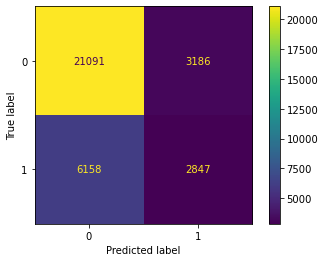

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [30]:
precision_score(y_test, y_pred)

0.47190452511188463

## Imbalanced learn

In [11]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [42]:
X['Arrest'].value_counts()

0    80923
1    30015
Name: Arrest, dtype: int64

In [48]:
smote = SMOTE(random_state=0)
_X, _y = smote.fit_resample(X, y)

In [50]:
_X['Arrest'].value_counts()

1    80923
0    80923
Name: Arrest, dtype: int64

In [51]:
X, y = sample, sample['Arrest']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                   stratify=y)

In [52]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_sub.values, y_train_sub.values)
print(f"Train Accuracy: {knn.score(X_train_sub.values, y_train_sub.values)*100:0.3f}%")
print(f"Valid Accuracy: {knn.score(X_valid.values, y_valid.values)*100:0.3f}%")

Train Accuracy: 76.965%
Valid Accuracy: 73.294%


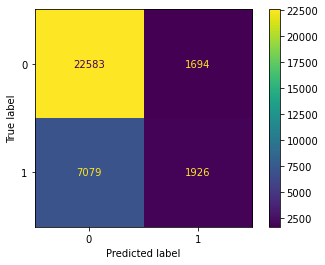

In [53]:
y_pred = knn.predict(X_test.values)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [54]:
precision_score(y_test, y_pred)

0.5320441988950276

In [60]:
one_hot_re = one_hot_encode(df, cat_features)
one_hot_re.shape

(369793, 985)

In [62]:
X, y = one_hot_re, one_hot_re['Arrest']
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                   stratify=y_resampled)

## refactor data

In [5]:
cleaned_data = 'cleaned_data.zip'
ds = DataSet(cleaned_data)
data = ds.load_subset(['2010'])
df = data.apply(pd.to_numeric, errors = 'ignore')

root_dir = os.getcwd()
com_data = os.path.join(root_dir, 'data', 'Per_Capita_Income.csv')
com_df = pd.read_csv(com_data)
com_df = com_df.apply(pd.to_numeric, errors='ignore')

com_df.fillna(0)
com_df = com_df.rename(columns={'Community Area Number': 'Community Area'})
df = df[df['Community Area'] != 0]
df = df.merge(com_df, how='left', on='Community Area')

df.drop(['Block'], axis=1, inplace=True)
df.drop(['Description'], axis=1, inplace=True)
df.drop(['Location Description'], axis=1, inplace=True)
df.drop(['Updated On'], axis=1, inplace=True)
df.drop(['Location'], axis=1, inplace=True)
df.drop(['COMMUNITY AREA NAME'], axis=1, inplace=True)
df.drop(['Year'], axis=1, inplace=True)

C:\Users\ajshe\Documents\year4\fall-2021\stat451\CrimeAnalysisML\data\cleaned_data.zip
downloading: data/2010/data_2010.csv ...
done.
build DataFrame ...


In [6]:
drop_cols = ["Month","dayOfMonth", "Hour", "Day", "Minute", 'dayOfYear', 'weekOfMonth', 'weekOfYear',"X Coordinate", "Y Coordinate", 
                        "Latitude", "Longitude", "Rot30_X", "Rot30_Y", "Rot45_X", "Rot45_Y",
                        "Rot60_X", "Rot60_Y", "Radius", "Angle"]
df.drop(drop_cols, axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369793 entries, 0 to 369792
Data columns (total 20 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Arrest                                        369793 non-null  int64  
 1   Domestic                                      369793 non-null  int64  
 2   Beat                                          369793 non-null  int64  
 3   District                                      369793 non-null  float64
 4   Ward                                          369793 non-null  float64
 5   Community Area                                369793 non-null  float64
 6   dayOfWeek                                     369793 non-null  int64  
 7   Holiday                                       369793 non-null  int64  
 8   BusinessHour                                  369793 non-null  int64  
 9   Season                                        36

In [45]:
categories =  ['Community Area', 'dayOfWeek', 'Holiday', 
               'Season', 'Cluster', 'Beat', 'District', 'Ward', 'Type']
one_hot = one_hot_encode(df, categories)
sample = one_hot.sample(frac=0.5, random_state=123)

In [46]:
X, y = one_hot, one_hot['Arrest']
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_temp, X_test, y_temp, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                   stratify=y_resampled)

KeyboardInterrupt: 

In [107]:
X_train, X_valid, y_train, y_valid = \
    train_test_split(X_temp, y_temp, test_size=0.2, random_state=1, stratify=y_train)
print('Train/Valid/Test sizes:', y_train.shape[0], y_valid.shape[0], y_test.shape[0])

Train/Valid/Test sizes: 301656 75415 161603


In [84]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train.values, y_train.values)
print(f"Train Accuracy: {knn.score(X_train.values, y_train.values)*100:0.3f}%")
print(f"Valid Accuracy: {knn.score(X_valid.values, y_valid.values)*100:0.3f}%")

Train Accuracy: 97.767%
Valid Accuracy: 96.359%


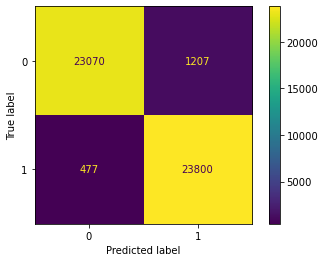

In [85]:
y_pred = knn.predict(X_test.values)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [86]:
precision_score(y_test, y_pred)

0.9517335146159075

In [12]:
categories =  ['Community Area', 'dayOfWeek', 'Holiday', 
               'Season', 'Cluster', 'Beat', 'District', 'Ward', 'Type']
one_hot = one_hot_encode(df, categories)

X, y = one_hot.drop('Arrest', axis=1).copy(), one_hot['Arrest']

smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_temp, X_test, y_temp, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                   stratify=y_resampled)
X_train, X_valid, y_train, y_valid = \
    train_test_split(X_temp, y_temp, test_size=0.2, random_state=1, stratify=y_temp)
print('Train/Valid/Test sizes:', y_train.shape[0], y_valid.shape[0], y_test.shape[0])


Train/Valid/Test sizes: 301656 75415 161603


In [13]:
boost = xgb.XGBClassifier()

boost.fit(X_train.values, y_train.values, verbose=True)
    
print("Training Accuracy: %0.2f" % boost.score(X_train.values, y_train.values))
print("Validation Accuracy: %0.2f" % boost.score(X_valid.values, y_valid.values))
print("Test Accuracy: %0.2f" % boost.score(X_test.values, y_test.values))

C:\Users\ajshe\anaconda3\envs\stat451\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:30:40] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 0.89
Validation Accuracy: 0.89
Test Accuracy: 0.89


In [14]:
from catboost import CatBoostClassifier


boost = CatBoostClassifier(verbose=0)

boost.fit(X_train, y_train)


print("Training Accuracy: %0.2f" % boost.score(X_train, y_train))
print("Validation Accuracy: %0.2f" % boost.score(X_valid, y_valid))
print("Test Accuracy: %0.2f" % boost.score(X_test, y_test))

Training Accuracy: 0.89
Validation Accuracy: 0.89
Test Accuracy: 0.89


In [12]:
from sklearn.ensemble import GradientBoostingClassifier


boost = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=8,
    random_state=1)

boost.fit(X_train, y_train)
    
    
print("Training Accuracy: %0.2f" % boost.score(X_train, y_train))
print("Validation Accuracy: %0.2f" % boost.score(X_valid, y_valid))
print("Test Accuracy: %0.2f" % boost.score(X_test, y_test))

KeyboardInterrupt: 

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions


tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=2, 
                              random_state=1)
tree.fit(X_train.values, y_train.values)

print("Training Accuracy: %0.2f" % tree.score(X_train, y_train))
print("Validation Accuracy: %0.2f" % tree.score(X_valid, y_valid))
print("Test Accuracy: %0.2f" % tree.score(X_test, y_test))

C:\Users\ajshe\anaconda3\envs\stat451\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Training Accuracy: 1.00
Validation Accuracy: 1.00


C:\Users\ajshe\anaconda3\envs\stat451\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\ajshe\anaconda3\envs\stat451\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Test Accuracy: 1.00


In [15]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from mlxtend.classifier import EnsembleVoteClassifier


clf1 = DecisionTreeClassifier(random_state=1, max_depth=None)
clf2 = DecisionTreeClassifier(random_state=1, max_depth=1)
clf3 = DecisionTreeClassifier(random_state=1, max_depth=2)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1, 1, 1])

labels = ['Classifier 1', 'Classifier 2', 'Classifier 3', 'Ensemble']
for clf, label in zip([clf1, clf2, clf3, eclf], labels):

    clf.fit(X_train, y_train)
    print("Validation Accuracy: %0.2f [%s]" % (clf.score(X_valid, y_valid), label))
    
print("Test Accuracy: %0.2f" % eclf.score(X_test, y_test))

Validation Accuracy: 0.87 [Classifier 1]
Validation Accuracy: 0.71 [Classifier 2]
Validation Accuracy: 0.71 [Classifier 3]
Validation Accuracy: 0.71 [Ensemble]
Test Accuracy: 0.71


In [16]:
tree = DecisionTreeClassifier(criterion='entropy',
                              random_state=1,
                              max_depth=1)


boost = AdaBoostClassifier(base_estimator=tree,
                           n_estimators=500,
                           algorithm='SAMME',
                           #n_jobs=1,
                           random_state=1)

boost.fit(X_train, y_train)
    
    
print("Valid Accuracy: %0.2f" % boost.score(X_valid, y_valid))
print("Test Accuracy: %0.2f" % boost.score(X_test, y_test))

KeyboardInterrupt: 

In [26]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators=100,
                                random_state=1)

forest.fit(X_train, y_train)
    
print("Training Accuracy: %0.2f" % forest.score(X_train, y_train))
print("Validation Accuracy: %0.2f" % forest.score(X_valid, y_valid))
print("Test Accuracy: %0.2f" % forest.score(X_test, y_test))

Training Accuracy: 1.00
Validation Accuracy: 1.00
Test Accuracy: 1.00


In [40]:
X_test[(X_test['Arrest'] ==1) & (X_test['Type'] == 18)]

,Arrest,Domestic,BusinessHour,Weekend,Type,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,...,Ward_41.0,Ward_42.0,Ward_43.0,Ward_44.0,Ward_45.0,Ward_46.0,Ward_47.0,Ward_48.0,Ward_49.0,Ward_50.0
414482,1,0,1,1,18,14.8,33.9,17.3,35.4,38.0,...,0,0,0,0,0,0,0,0,0,0
69970,1,0,1,1,18,11.9,29.0,23.0,41.5,38.9,...,0,0,0,0,0,0,0,0,0,0
390318,1,0,1,1,18,14.8,33.9,17.3,35.4,38.0,...,0,0,0,0,0,0,0,0,0,0
381295,1,0,0,1,18,2.5,19.8,20.3,16.9,41.2,...,0,0,0,0,0,0,0,0,0,0
402944,1,0,1,0,18,6.3,28.6,22.6,24.4,37.9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462842,1,0,1,0,18,7.4,43.1,21.2,27.6,42.7,...,0,0,0,0,0,0,0,0,0,0
494911,1,0,0,0,18,7.6,27.9,17.1,31.2,40.6,...,0,0,0,0,0,0,0,0,0,0
507308,1,0,0,0,18,2.8,31.1,20.0,14.0,35.7,...,0,0,0,0,0,0,0,0,0,0
457331,1,0,0,0,18,3.8,24.0,8.9,11.8,22.2,...,0,0,0,0,0,1,0,0,0,0


In [41]:
X_test['Type'].value_counts()

18    34678
33    27321
2     26909
6     13343
1      9736
25     8408
3      8120
8      6449
17     6415
30     4933
9      4413
28     2371
34     2164
26     1839
23      902
10      671
13      611
5       564
16      524
31      404
0       205
11      186
15      102
32       85
14       57
24       53
7        52
29       27
22       26
27       23
12        8
4         4
Name: Type, dtype: int64

## Hyperparam tuning

In [19]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np
import optuna

In [34]:
categories =  ['Community Area', 'dayOfWeek', 'Holiday', 
               'Season', 'Cluster', 'Beat', 'District', 'Ward', 'Type']
one_hot = one_hot_encode(df, categories)
selected_columns = ['Type_18','Weekend','BusinessHour','Type_33','Type_8','Type_6','Domestic' ,'Season_2',
                    'Season_4','Type_2','Type_3', 'Arrest']

feature_data = one_hot[selected_columns]
feature_data.head()

,Type_18,Weekend,BusinessHour,Type_33,Type_8,Type_6,Domestic,Season_2,Season_4,Type_2,Type_3,Arrest
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,0,0,0,1,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,1


In [35]:
X, y = feature_data.drop('Arrest', axis=1).copy(), feature_data['Arrest']

smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_temp, X_test, y_temp, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                   stratify=y_resampled)
X_train, X_valid, y_train, y_valid = \
    train_test_split(X_temp, y_temp, test_size=0.2, random_state=1, stratify=y_temp)
print('Train/Valid/Test sizes:', y_train.shape[0], y_valid.shape[0], y_test.shape[0])

Train/Valid/Test sizes: 301656 75415 161603


In [36]:
def optimization_objective(trial, X_train, y_train, cv=5):

    
    params =  {
            "n_estimators": trial.suggest_categorical("n_estimators", [30, 50, 100, 300]),
            "learning_rate": trial.suggest_categorical("learning_rate", [0.01]),
            "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
            "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
    }
    

    cv_iterator = StratifiedKFold(n_splits=cv, shuffle=True, random_state=123)

    cv_scores = np.zeros(cv)
    for idx, (train_sub_idx, valid_idx) in enumerate(cv_iterator.split(X_train, y_train)):
        
        X_train_sub, X_valid = X_train[train_sub_idx], X_train[valid_idx]
        y_train_sub, y_valid = y_train[train_sub_idx], y_train[valid_idx]
        

        model = XGBClassifier(**params, random_state=123, use_label_encoder=False)
        
        model.fit(
            X_train_sub,
            y_train_sub,
            verbose=False,
            eval_set=[(X_valid, y_valid)],
            eval_metric="auc",
            early_stopping_rounds=100,
        )
        
        preds = model.score(X_valid, y_valid)
        
        cv_scores[idx] = preds

    return np.mean(cv_scores)

In [37]:
study = optuna.create_study(direction="maximize", study_name="XGBoost Classifier")

def func(trial):
    return optimization_objective(trial, X_train.values, y_train.values)

study.optimize(func, n_trials=25);

[I 2021-12-05 19:08:38,744] A new study created in memory with name: XGBoost Classifier
[I 2021-12-05 19:08:49,215] Trial 0 finished with value: 0.7415831261084751 and parameters: {'n_estimators': 30, 'learning_rate': 0.01, 'lambda': 0.0012282066687081881, 'alpha': 0.00013187782540887276}. Best is trial 0 with value: 0.7415831261084751.
[I 2021-12-05 19:09:26,621] Trial 1 finished with value: 0.7415963862898081 and parameters: {'n_estimators': 100, 'learning_rate': 0.01, 'lambda': 3.9670329661186123e-07, 'alpha': 1.5281240083735242e-08}. Best is trial 1 with value: 0.7415963862898081.
[I 2021-12-05 19:10:10,019] Trial 2 finished with value: 0.7415963862898081 and parameters: {'n_estimators': 100, 'learning_rate': 0.01, 'lambda': 0.6034760379180225, 'alpha': 5.374380122838006e-06}. Best is trial 1 with value: 0.7415963862898081.
[I 2021-12-05 19:11:59,290] Trial 3 finished with value: 0.7415963862898081 and parameters: {'n_estimators': 300, 'learning_rate': 0.01, 'lambda': 0.00639094977

In [38]:
print(f"Best CV accuracy: {study.best_value:.5f}")
print("Best params:")

for key, value in study.best_params.items():
    print(f"\t{key}: {value}")

Best CV accuracy: 0.74160
Best params:
	n_estimators: 300
	learning_rate: 0.01
	lambda: 6.75602695966699e-05
	alpha: 1.5250645374694402e-05


In [39]:
model = XGBClassifier(**study.best_params, random_state=123, use_label_encoder=False)
model.fit(
    X_train,
    y_train,
    verbose=False,
    eval_set=[(X_valid, y_valid)],
    eval_metric="auc",
    early_stopping_rounds=100,
)

XGBClassifier(alpha=1.5250645374694402e-05, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              lambda=6.75602695966699e-05, learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=1.52506445e-05, reg_lambda=6.75602714e-05,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, ...)

In [41]:
print(f"Training Accuracy: {model.score(X_train, y_train):0.3f}")
print(f"Test Accuracy: {model.score(X_test, y_test):0.3f}")

Training Accuracy: 0.742
Test Accuracy: 0.741


In [42]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.linear_model import LogisticRegression


forest = RandomForestClassifier(n_estimators=100,
                                random_state=123)

boost = XGBClassifier(random_state=123, verbosity=0, use_label_encoder=False)

metaclassifier = LogisticRegression(random_state=123)

sclf = StackingCVClassifier(classifiers=[forest, boost], 
                            meta_classifier=metaclassifier, 
                            random_state=123)

In [44]:
forest.fit(X_train, y_train)
print(f"Training Accuracy: {forest.score(X_train, y_train):0.2f}")
print(f"Validation Accuracy: {forest.score(X_valid, y_valid):0.2f}")
print(f"Test Accuracy: {forest.score(X_test, y_test):0.2f}")

Training Accuracy: 0.74
Validation Accuracy: 0.74
Test Accuracy: 0.74


In [45]:
boost.fit(X_train, y_train)
print(f"Training Accuracy: {boost.score(X_train, y_train):0.2f}")
print(f"Validation Accuracy: {boost.score(X_valid, y_valid):0.2f}")
print(f"Test Accuracy: {boost.score(X_test, y_test):0.2f}")

Training Accuracy: 0.74
Validation Accuracy: 0.74
Test Accuracy: 0.74


In [46]:
sclf.fit(X_train, y_train)
print(f"Training Accuracy: {sclf.score(X_train, y_train):0.2f}")
print(f"Validation Accuracy: {sclf.score(X_valid, y_valid):0.2f}")
print(f"Test Accuracy: {sclf.score(X_test, y_test):0.2f}")

Training Accuracy: 0.74
Validation Accuracy: 0.74
Test Accuracy: 0.74


In [48]:
import numpy as np
import scipy.stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(sclf)

params = {
    'stackingcvclassifier__use_probas': [True],
    'stackingcvclassifier__drop_proba_col': [None, 'last'],
    'stackingcvclassifier__xgbclassifier__reg_alpha': scipy.stats.loguniform(1e-5, 1),
    'stackingcvclassifier__xgbclassifier__max_depth': [2, 4, 6, 8],
    'stackingcvclassifier__randomforestclassifier__n_estimators': [10, 100]
}


search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=params,
    n_iter=10,
    cv=10,
    verbose=2,
    n_jobs=1)

search.fit(X_train, y_train)
search.best_score_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END stackingcvclassifier__drop_proba_col=last, stackingcvclassifier__randomforestclassifier__n_estimators=10, stackingcvclassifier__use_probas=True, stackingcvclassifier__xgbclassifier__max_depth=4, stackingcvclassifier__xgbclassifier__reg_alpha=0.0003816732547316462; total time=  12.5s
[CV] END stackingcvclassifier__drop_proba_col=last, stackingcvclassifier__randomforestclassifier__n_estimators=10, stackingcvclassifier__use_probas=True, stackingcvclassifier__xgbclassifier__max_depth=4, stackingcvclassifier__xgbclassifier__reg_alpha=0.0003816732547316462; total time=  12.5s
[CV] END stackingcvclassifier__drop_proba_col=last, stackingcvclassifier__randomforestclassifier__n_estimators=10, stackingcvclassifier__use_probas=True, stackingcvclassifier__xgbclassifier__max_depth=4, stackingcvclassifier__xgbclassifier__reg_alpha=0.0003816732547316462; total time=  13.4s
[CV] END stackingcvclassifier__drop_proba_col=last, stacki

KeyboardInterrupt: 

In [52]:
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
import hyperopt.pyll.stochastic

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import numpy as np

In [53]:
params =  {
        "n_estimators": hp.choice("n_estimators", [30, 50, 100, 300]),
        "learning_rate": hp.choice("learning_rate", [0.01]),
        "lambda": hp.loguniform("lambda", 1e-8, 1.0),
        "alpha": hp.loguniform("alpha", 1e-8, 1.0),
}


def optimization_objective(params):

    model = XGBClassifier(random_state=123, use_label_encoder=False, **params)
    model.fit(X_train, y_train)
    
    accuracies = cross_val_score(
        estimator=model, X=X_train, y=y_train, cv=10, n_jobs=-1)

    score = accuracies.mean()

    return {'loss':1-score, 'status': STATUS_OK}

In [ ]:
trials = Trials()
best = fmin(fn=optimization_objective,
            space=params,
            algo=tpe.suggest,
            max_evals=25,
            trials=trials)

  8%|▋       | 2/25 [00:46<08:48, 22.99s/trial, best loss: 0.25843345917548954]